In [72]:
import math
import random
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [73]:
x = np.arange(1,11)
y = np.array([2.2, 3.1, 4.1, 5.0, 5.8, 6.9, 7.8, 9.0, 10.2, 11.1])

In [74]:
def b0(x, y):
    return (sum(y)*sum(x**2) - sum(x*y)*sum(x)) / (len(x)*sum(x**2) - sum(x)**2)

In [75]:
def b1(x, y):
    return (sum(y)*sum(x) - sum(x*y)*len(x)) / (sum(x)**2 - len(x)*sum(x**2))

In [76]:
def S(arr):
    mean = np.mean(arr)
    n = len(arr)
    return np.sqrt(sum((arr - mean)**2) / n)

In [77]:
def r(x, y):
    return b1(x, y) * (S(x) / S(y))

In [78]:
def f(x, b_0, b_1):
    return b_0 + b_1*x

In [79]:
def D1(x, y):
    n = len(x)
    return (1 / (n-2)) * sum((y - f(x, b0(x, y), b1(x, y)))**2)

In [103]:
b0_t = b0(x, y)
b1_t = b1(x, y)

In [80]:
print(f"Коэффициенты b0 и b1: {b0(x, y)}, {b1(x, y)}")
print(f"Коэффициент корреляции: {r(x, y)}")
print(f"Дисперсия D1: {D1(x, y)}")

Коэффициенты b0 и b1: 1.0599999999999956, 0.9927272727272732
Коэффициент корреляции: 0.9988235670852302
Дисперсия D1: 0.023954545454545437


In [81]:
p = 0.05
S2 = 0.1

In [82]:
if D1(x, y) / S2 < sts.f.ppf(p, 2, 2):
    print("Дисперсия незначима")
print(D1(x, y) / S2, sts.f.ppf(p, 2, 2))

0.23954545454545437 0.052631578947368474


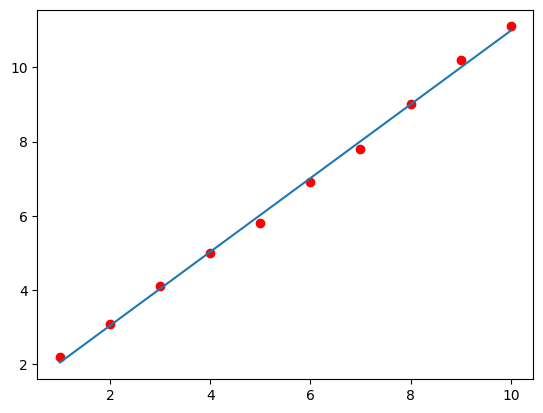

In [83]:
plt.plot(x, f(x, b0(x, y), b1(x, y)))
plt.scatter(x, y, color='r')
plt.show()

In [88]:
random.seed(0)
max_error = 0.2
errors = [random.uniform(-max_error, max_error) for _ in y]
y = [y[i] + i* errors[i] for i in range(len(y))]

In [89]:
print(f"Коэффициенты b0 и b1: {b0(x, y)}, {b1(x, y)}")
print(f"Коэффициент корреляции: {r(x, y)}")
print(f"Дисперсия D1: {D1(x, y)}")

Коэффициенты b0 и b1: 0.9319684510885219, 1.0136030015225614
Коэффициент корреляции: 0.9784862803803569
Дисперсия D1: 0.471019409249137


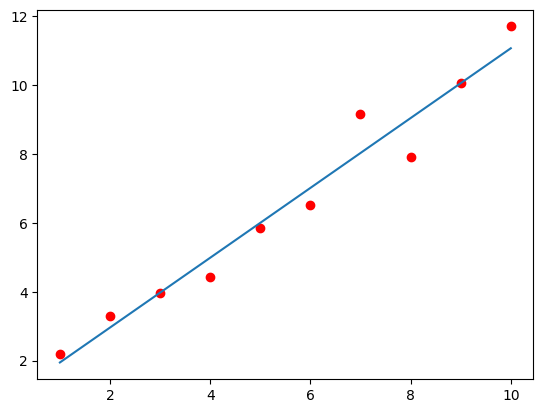

In [90]:
plt.plot(x, f(x, b0(x, y), b1(x, y)))
plt.scatter(x, y, color='r')
plt.show()

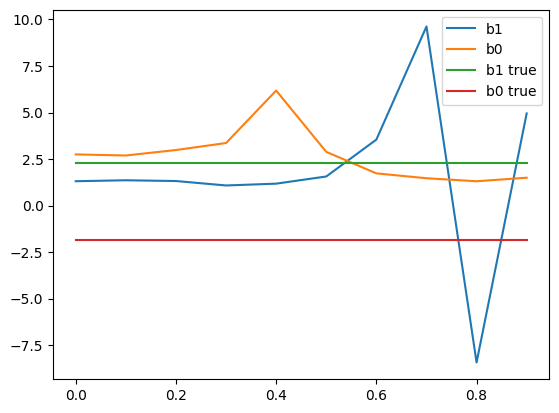

In [115]:
random.seed(42)
y = [2.2, 3.1, 4.1, 5, 5.8, 6.9, 7.8, 9, 10.2, 11.1]
max_errors = [i / 10 for i in range(10)]
Ds = []
Bs = []
for max_error in max_errors:
    errors = [random.uniform(-max_error, max_error) for _ in y]
    y = [y[i] + i * errors[i] for i in range(len(y))]
    Bs.append(abs(b0_t - b0(x, y))/b0(x, y))
    Ds.append(abs(b1_t - b1(x, y))/ b1(x, y))
plt.plot(max_errors, Ds, label='b1')
plt.plot(max_errors, Bs, label='b0')
plt.plot(max_errors, [b1_t for _ in max_errors], label='b1 true')
plt.plot(max_errors, [b0_t for _ in max_errors], label='b0 true')
plt.legend()
plt.show()